In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#컬럼 한꺼번에보기
from IPython.display import display
pd.options.display.max_columns = None
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
import cx_Oracle

db = cx_Oracle.connect("LMEMBER", "lmember", 'localhost:1521/xepdb1')
cursor = db.cursor()
cursor.execute('select * from SMALL_AVG')

# SMALL_AVG
# create table SMALL_AVG as 
# select min(p.제휴사) 제휴사, min(p.대분류코드) p.대분류코드, min(p.중분류코드) p.중분류코드, p.소분류코드 ,
# round(avg(p.구매금액),0) p.소분류평균, 간략분류 from purprd p 
# where 소분류코드 in (select 소분류코드 from food_abc) group by 소분류코드;

x = cursor.fetchall()
small_avg = pd.DataFrame(x)
cursor.execute("""select column_name from user_tab_columns where table_name='SMALL_AVG'""")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
small_avg.columns = list1
cursor.close()
db.close()

In [3]:
small_avg

,제휴사,S_CAT,소분류평균,NEW_CAT
0,B,B160101,3778,주류
1,B,B050901,2926,농산물
2,B,B060105,5673,수산물
3,B,B100306,4252,음료
4,B,B670402,4839,간식류
...,...,...,...,...
2030,C,C030209,3973,농산물
2031,B,B790701,27200,수산물
2032,B,B061104,21000,수산물
2033,B,B070203,4510,수산물


In [5]:
small_avg['NEW_CAT'].unique()

array(['주류', '농산물', '수산물', '음료', '간식류', '육류', '식사류/반찬', '건강식품'],
      dtype=object)

In [16]:
수산물 = small_avg[small_avg['NEW_CAT']=='수산물']
qt_20 = np.percentile(수산물['소분류평균'],20)
qt_40 = np.percentile(수산물['소분류평균'],40)
qt_60 = np.percentile(수산물['소분류평균'],60)
qt_80 = np.percentile(수산물['소분류평균'],80)
print('수산물 카테고리 내 가격 별 5등분 분기점:{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(qt_20,qt_40,qt_60,qt_80))

수산물 카테고리 내 가격 별 5등분 분기점:4912.20, 7334.80, 9579.80, 13470.60


In [17]:
육류 = small_avg[small_avg['NEW_CAT']=='육류']
qt_20 = np.percentile(육류['소분류평균'],20)
qt_40 = np.percentile(육류['소분류평균'],40)
qt_60 = np.percentile(육류['소분류평균'],60)
qt_80 = np.percentile(육류['소분류평균'],80)
print('육류 카테고리 내 가격 별 5등분 분기점:{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(qt_20,qt_40,qt_60,qt_80))

육류 카테고리 내 가격 별 5등분 분기점:8050.40, 11337.20, 15024.40, 22596.60


In [18]:
식사류반찬 = small_avg[small_avg['NEW_CAT']=='식사류/반찬']
qt_20 = np.percentile(식사류반찬['소분류평균'],20)
qt_40 = np.percentile(식사류반찬['소분류평균'],40)
qt_60 = np.percentile(식사류반찬['소분류평균'],60)
qt_80 = np.percentile(식사류반찬['소분류평균'],80)
print('식사류반찬 카테고리 내 가격 별 5등분 분기점:{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(qt_20,qt_40,qt_60,qt_80))

식사류반찬 카테고리 내 가격 별 5등분 분기점:3534.80, 4985.60, 6708.60, 9582.80


In [15]:
농산물 = small_avg[small_avg['NEW_CAT']=='농산물']
qt_20 = np.percentile(농산물['소분류평균'],20)
qt_40 = np.percentile(농산물['소분류평균'],40)
qt_60 = np.percentile(농산물['소분류평균'],60)
qt_80 = np.percentile(농산물['소분류평균'],80)
print('농산물 카테고리 내 가격 별 5등분 분기점:{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(qt_20,qt_40,qt_60,qt_80))

농산물 카테고리 내 가격 별 5등분 분기점:2696.60, 4638.00, 7709.00, 11192.40


In [19]:
간식류 = small_avg[small_avg['NEW_CAT']=='간식류']
qt_20 = np.percentile(간식류['소분류평균'],20)
qt_40 = np.percentile(간식류['소분류평균'],40)
qt_60 = np.percentile(간식류['소분류평균'],60)
qt_80 = np.percentile(간식류['소분류평균'],80)
print('간식류 카테고리 내 가격 별 5등분 분기점:{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(qt_20,qt_40,qt_60,qt_80))

간식류 카테고리 내 가격 별 5등분 분기점:3359.40, 4868.20, 6673.40, 10162.40


In [21]:
음료 = small_avg[small_avg['NEW_CAT']=='음료']
qt_20 = np.percentile(음료['소분류평균'],20)
qt_40 = np.percentile(음료['소분류평균'],40)
qt_60 = np.percentile(음료['소분류평균'],60)
qt_80 = np.percentile(음료['소분류평균'],80)
print('음료 카테고리 내 가격 별 5등분 분기점:{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(qt_20,qt_40,qt_60,qt_80))

음료 카테고리 내 가격 별 5등분 분기점:2890.40, 4080.20, 6402.40, 11171.40


In [20]:
건강식품 = small_avg[small_avg['NEW_CAT']=='건강식품']
qt_20 = np.percentile(건강식품['소분류평균'],20)
qt_40 = np.percentile(건강식품['소분류평균'],40)
qt_60 = np.percentile(건강식품['소분류평균'],60)
qt_80 = np.percentile(건강식품['소분류평균'],80)
print('건강식품 카테고리 내 가격 별 5등분 분기점:{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(qt_20,qt_40,qt_60,qt_80))

건강식품 카테고리 내 가격 별 5등분 분기점:10992.00, 21226.00, 47354.00, 85837.00


In [22]:
주류 = small_avg[small_avg['NEW_CAT']=='주류']
qt_20 = np.percentile(주류['소분류평균'],20)
qt_40 = np.percentile(주류['소분류평균'],40)
qt_60 = np.percentile(주류['소분류평균'],60)
qt_80 = np.percentile(주류['소분류평균'],80)
print('주류 카테고리 내 가격 별 5등분 분기점:{0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}'.format(qt_20,qt_40,qt_60,qt_80))

주류 카테고리 내 가격 별 5등분 분기점:4427.00, 6397.00, 14348.00, 34349.00


In [24]:
def price_category(new_cat, value):
    if new_cat == '농산물':
        if value < 2696:
            return 1
        elif value < 4638:
            return 2
        elif value < 7709:
            return 3
        elif value <  11192:
            return 4
        else:
            return 5
    elif new_cat == '육류': 
        if value < 8050:
            return 1
        elif value < 11337:
            return 2
        elif value < 15024:
            return 3
        elif value <  22596:
            return 4
        else:
            return 5
    elif new_cat == '간식류': 
        if value < 2696:
            return 1
        elif value < 4638:
            return 2
        elif value < 7709:
            return 3
        elif value <  11192:
            return 4
        else:
            return 5
    elif new_cat == '수산물': 
        if value < 4912:
            return 1
        elif value < 7334:
            return 2
        elif value < 9579:
            return 3
        elif value <  13470:
            return 4
        else:
            return 5
    elif new_cat == '식사류/반찬': 
        if value < 3534:
            return 1
        elif value < 4985:
            return 2
        elif value < 6708:
            return 3
        elif value < 9582:
            return 4
        else:
            return 5
    elif new_cat == '건강식품':
        if value < 10992:
            return 1
        elif value < 21226:
            return 2
        elif value < 47354:
            return 3
        elif value < 85837:
            return 4
        else:
            return 5
    elif new_cat == '주류':
        if value < 4427:
            return 1
        elif value < 6397:
            return 2
        elif value < 14348:
            return 3
        elif value < 34349:
            return 4
        else:
            return 5
    elif new_cat == '음료':
        if value < 2890:
            return 1
        elif value < 4080:
            return 2
        elif value < 6402:
            return 3
        elif value < 11171:
            return 4
        else:
            return 5
    else:
        return ' '

In [25]:
small_avg['CLASS'] = small_avg.apply(lambda x :price_category(x.NEW_CAT, x.소분류평균), axis = 1)

In [27]:
small_avg

,제휴사,S_CAT,소분류평균,NEW_CAT,CLASS
0,B,B160101,3778,주류,1
1,B,B050901,2926,농산물,2
2,B,B060105,5673,수산물,2
3,B,B100306,4252,음료,3
4,B,B670402,4839,간식류,3
...,...,...,...,...,...
2030,C,C030209,3973,농산물,2
2031,B,B790701,27200,수산물,5
2032,B,B061104,21000,수산물,5
2033,B,B070203,4510,수산물,1


- 소분류별 평균 가격을 구한 후, 'NEW_CAT(간략분류)' 기준으로 5등급을 매김. 
- 용이한 회귀분석을 위해 가격이 높은 물건에 더 큰 숫자를 부여했음
    - 1등급에는 5점, 2등급에는 4점 ... 5등급에는 1점을 부여

In [28]:
small_avg = small_avg.rename({'CLASS':'CLASS_POINT'},axis='columns')

In [29]:
small_avg

,제휴사,S_CAT,소분류평균,NEW_CAT,CLASS_POINT
0,B,B160101,3778,주류,1
1,B,B050901,2926,농산물,2
2,B,B060105,5673,수산물,2
3,B,B100306,4252,음료,3
4,B,B670402,4839,간식류,3
...,...,...,...,...,...
2030,C,C030209,3973,농산물,2
2031,B,B790701,27200,수산물,5
2032,B,B061104,21000,수산물,5
2033,B,B070203,4510,수산물,1


In [30]:
# small_avg.to_csv('dataset/small_avg_class_point.csv', encoding='utf-8-sig')

A제휴사의 평균 등급 점수(5점에 가까울수록 비싼 품목)

In [38]:
np.round(np.mean(small_avg[(small_avg['제휴사']=='A')]['CLASS_POINT']),2)

4.37

B제휴사의 평균 등급 점수(5점에 가까울수록 비싼 품목)

In [40]:
np.round(np.mean(small_avg[(small_avg['제휴사']=='B')]['CLASS_POINT']),2)

3.04

C제휴사의 평균 등급 점수(5점에 가까울수록 비싼 품목)

In [39]:
np.round(np.mean(small_avg[(small_avg['제휴사']=='C')]['CLASS_POINT']),2)

2.65

A제휴사 품목은 대체로 4점~5점의 고가상품으로 구성

(array([ 3.,  4., 13., 27., 76.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

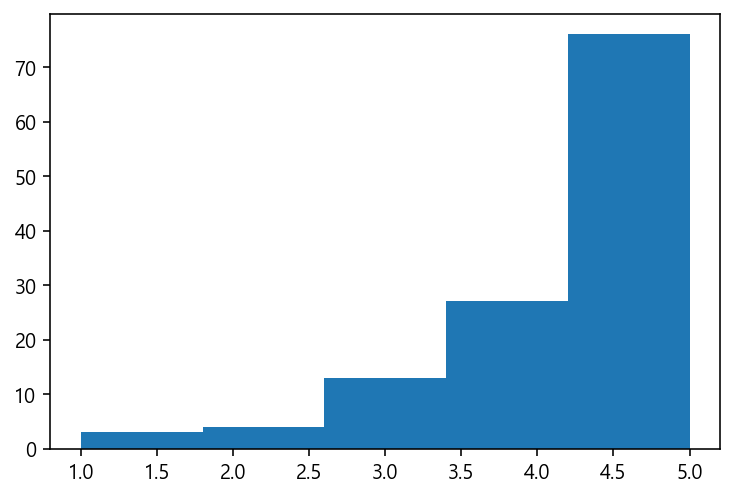

In [43]:
A_class = small_avg[(small_avg['제휴사']=='A')]
plt.hist(A_class['CLASS_POINT'],bins=5)

B제휴사 품목은 등급이 고르게 분포되어 있는데, 3등급 물품이 가장 많음.

(array([221., 266., 302., 267., 246.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

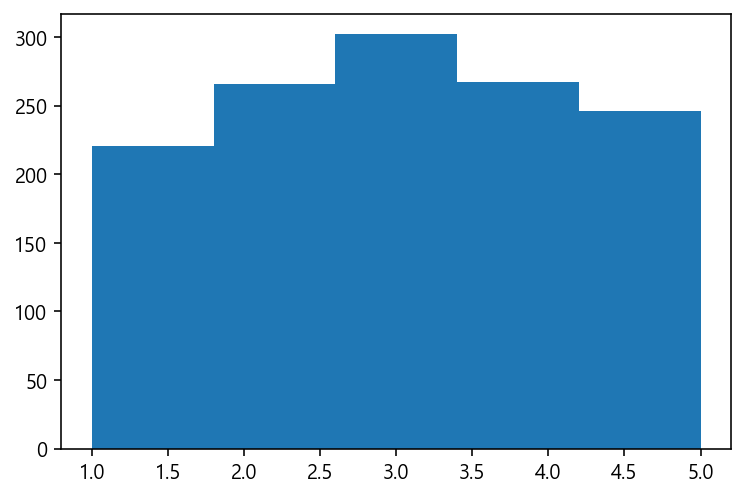

In [44]:
B_class = small_avg[(small_avg['제휴사']=='B')]
plt.hist(B_class['CLASS_POINT'],bins=5)

C제휴사에는 1~2점짜리와 3점짜리 상품이 많이 구성되어 있다. 고가 품목은 타 제휴사에 비해 적은 편이다.

(array([149., 161., 131.,  94.,  75.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

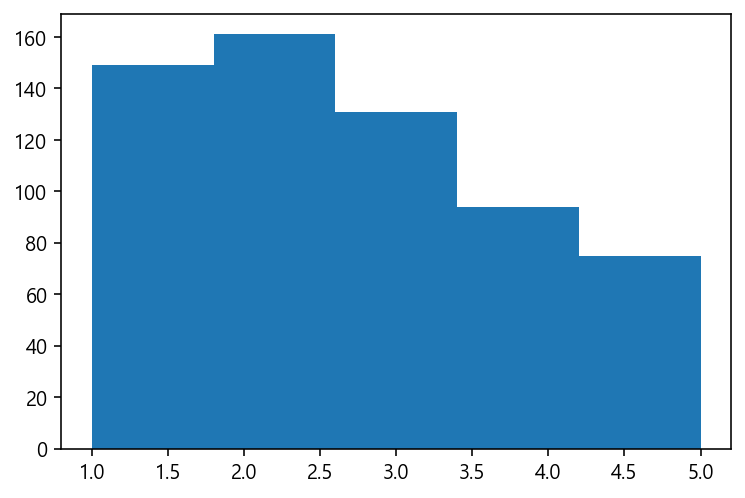

In [45]:
C_class = small_avg[(small_avg['제휴사']=='C')]
plt.hist(C_class['CLASS_POINT'],bins=5)

In [7]:
import cx_Oracle

db = cx_Oracle.connect("LMEMBER", "lmember", 'localhost:1521/xepdb1')
cursor = db.cursor()
#cursor.execute("select shop||'-'||gender||'-'||age cust, new_cat, -1 * gap gap from shop_cat1")
cursor.execute("select shop||'-'||gender||'-'||age cust, new_cat, amt_sum_14, amt_sum_15 from shop_cat1")
x = cursor.fetchall()
shop_cat = pd.DataFrame(x)
shop_cat.columns = ['고객','카테고리', '14년 매출금액', '15년 매출금액']
cursor.close()
db.close()

In [8]:
shop_cat

,고객,카테고리,14년 매출금액,15년 매출금액
0,B-M-35세~39세,간식류,2312118611,261538769
1,B-F-40세~44세,간식류,1735859708,965095873
2,B-F-35세~39세,음료,902666270,476156266
3,C-F-35세~39세,음료,535836833,275125820
4,B-M-45세~49세,음료,381792550,238260840
...,...,...,...,...
474,B-F-45세~49세,농산물,1386552836,1630563436
475,B-F-50세~54세,농산물,1144975419,1395486075
476,C-M-45세~49세,음료,74465605,403239550
477,C-F-50세~54세,음료,446732589,825999498


<AxesSubplot:xlabel='카테고리', ylabel='GAP'>

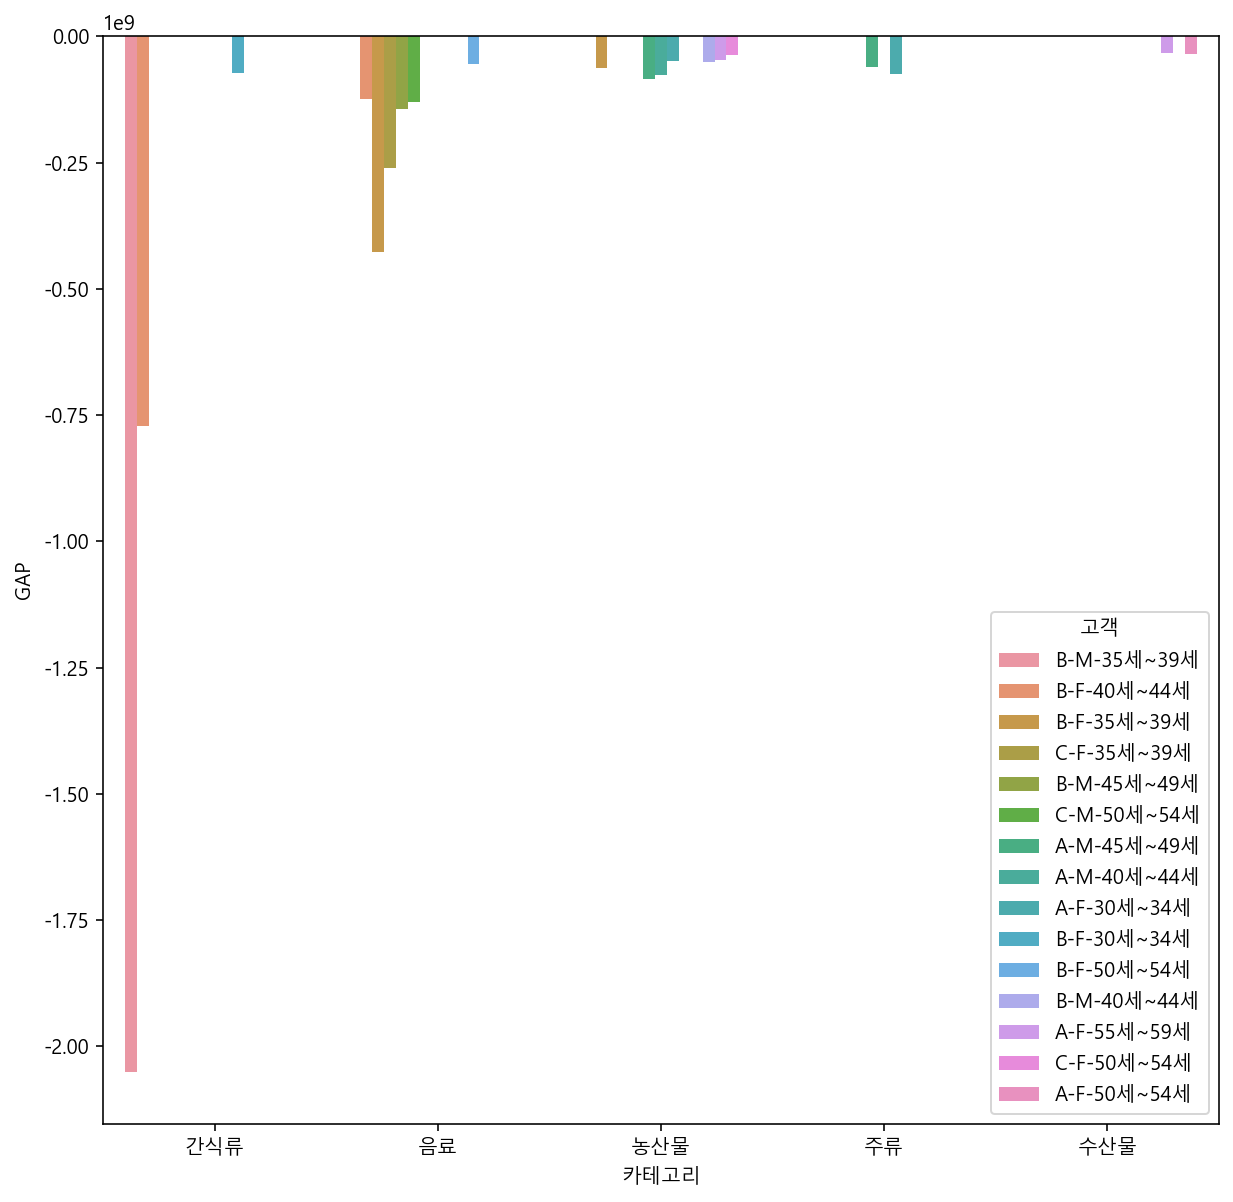

In [21]:
shop_cat['GAP'] = shop_cat['15년 매출금액']-shop_cat['14년 매출금액']
shop_cat.sort_values(by='GAP',ascending=True,inplace=True)
df = shop_cat[:20]
plt.figure(figsize=(10,10))
sns.barplot(x='카테고리',y='GAP',hue='고객',data=df)

<AxesSubplot:xlabel='카테고리', ylabel='GAP'>

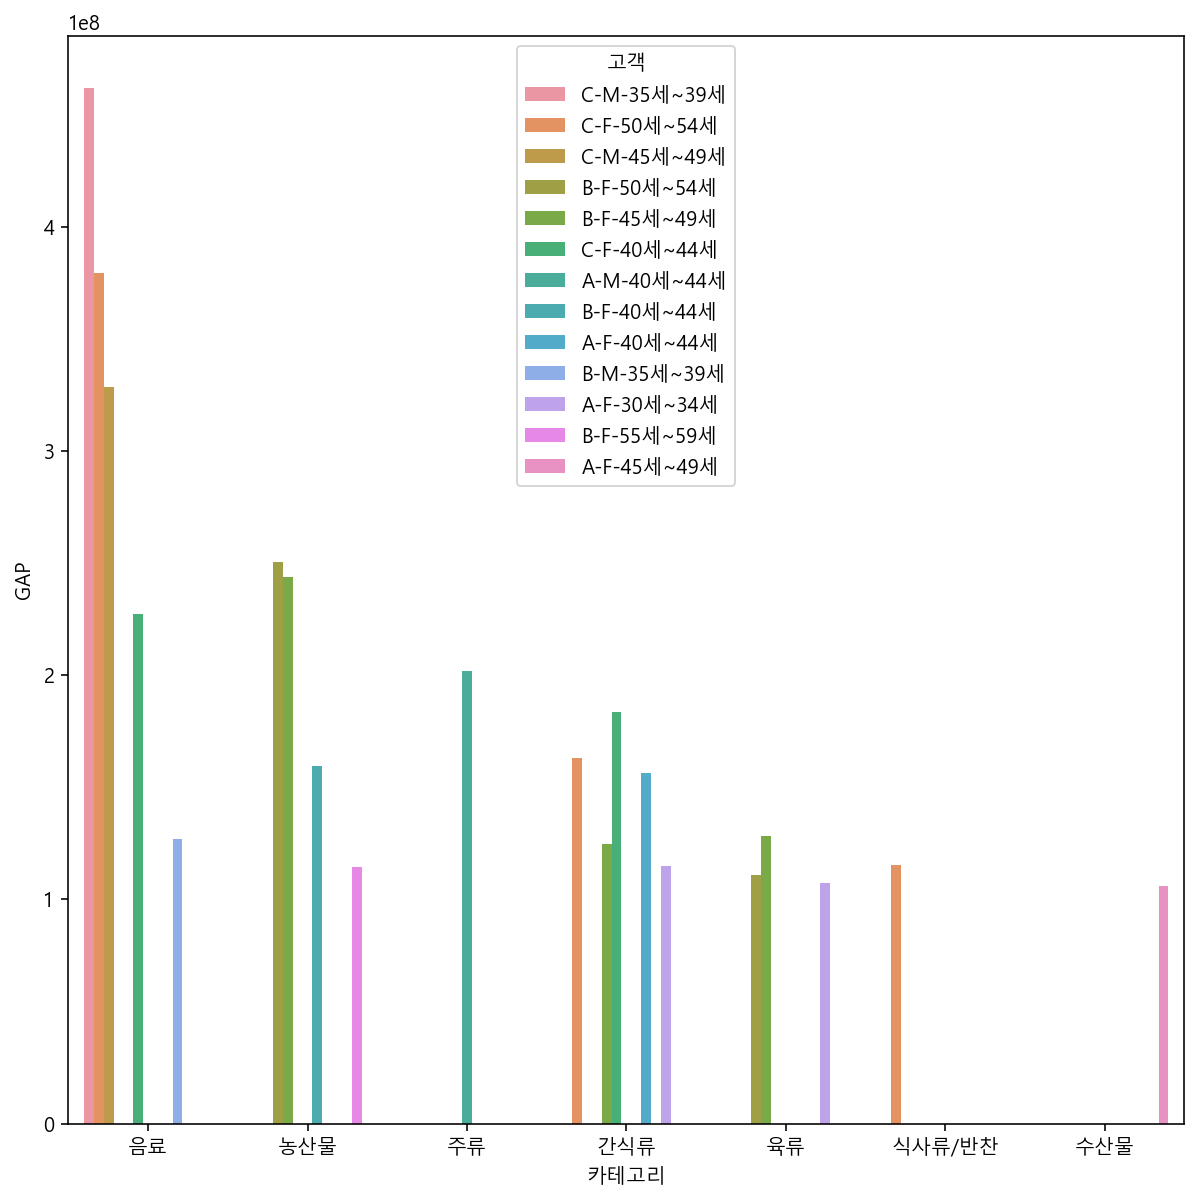

In [22]:
shop_cat['GAP'] = shop_cat['15년 매출금액']-shop_cat['14년 매출금액']
shop_cat.sort_values(by='GAP',ascending=False,inplace=True)
df = shop_cat[:20]
plt.figure(figsize=(10,10))
sns.barplot(x='카테고리',y='GAP',hue='고객',data=df)

In [23]:
import cx_Oracle

db = cx_Oracle.connect("LMEMBER", "lmember", 'localhost:1521/xepdb1')
cursor = db.cursor()
#cursor.execute("select shop||'-'||gender||'-'||age cust, new_cat, -1 * gap gap from shop_cat1")
cursor.execute("select 고객번호, 점포코드, sum(구매금액) from purprd where 소분류코드 in (select 소분류코드 from food_abc) group by 점포코드, 고객번호")
x = cursor.fetchall()
marketcode = pd.DataFrame(x)
marketcode.columns = ['고객번호','점포코드', '총구매액']
cursor.close()
db.close()

marketcode.head()

,고객번호,점포코드,총구매액
0,07133,033,12641512
1,18750,074,5025552
2,08528,075,5001467
3,16154,015,7768650
4,12922,031,5902210


In [34]:
marketcode.to_csv('dataset/marketcode.csv',encoding='cp949')

In [46]:
grouped = marketcode.groupby(['점포코드'])['고객번호'].count()
grouped.sort_values(ascending=False, inplace=True)
top_20_visited_market = grouped[:20]
top_20_visited_market = pd.DataFrame(top_20_visited_market)

In [52]:
top_20_visited_market['점포코드']= top_20_visited_market.index
top_20_visited_market

,고객번호,점포코드
점포코드,,
002,5223,002
001,4434,001
007,3531,007
004,2786,004
009,2714,009
041,2455,041
029,2392,029
020,2374,020
025,2198,025


In [65]:
grouped2 = marketcode.groupby(['점포코드'])['총구매액'].sum()
grouped2.sort_values(ascending=False, inplace=True)
top_20 = grouped2[:20]
top_20 = pd.DataFrame(top_20)
top_20

,총구매액
점포코드,
002,8165382258
007,7642281577
020,7034266061
001,5884226269
012,5254206490
029,5084640455
037,4377142327
013,3851304303
030,3703629503


In [66]:
top_20['점포코드']= top_20.index
top_20

,총구매액,점포코드
점포코드,,
002,8165382258,002
007,7642281577,007
020,7034266061,020
001,5884226269,001
012,5254206490,012
029,5084640455,029
037,4377142327,037
013,3851304303,013
030,3703629503,030


<AxesSubplot:xlabel='점포코드'>

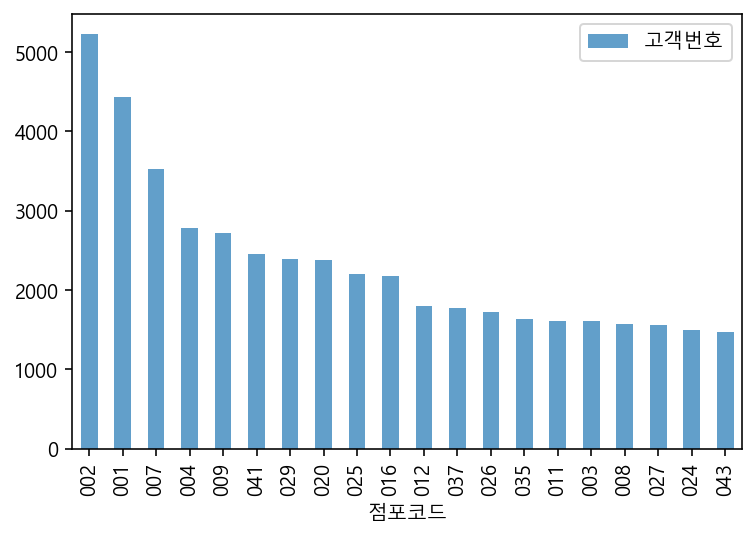

In [76]:
top_20_visited_market.plot.bar(alpha=0.7)

<AxesSubplot:xlabel='점포코드'>

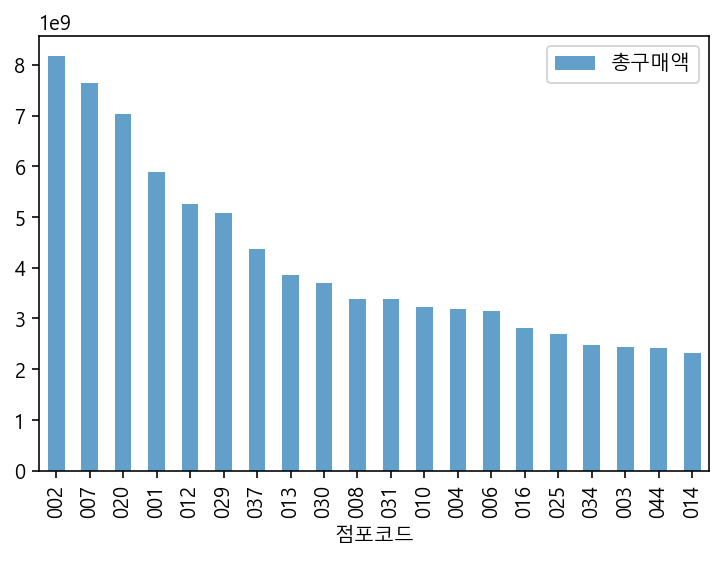

In [77]:
top_20.plot.bar(alpha=0.7)

In [80]:
marketcode[marketcode['점포코드']=='020'].describe()

,총구매액
count,2.374000e+03
mean,2.963044e+06
std,8.750387e+06
min,7.500000e+02
25%,4.352000e+04
50%,3.572900e+05
75%,4.287600e+06
max,2.943261e+08
